## Self coding/implementation of a 3 layer neural network (activation=sigmoid)
The original version is at backup (10)


In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def sigmoid(t):return 1/(1+np.exp(-t))


### Try a simple classification to verify it's correct

<font color="red">I am so happy this code implementation worked as I expected even without any debugging.\
    WOW!
</font>


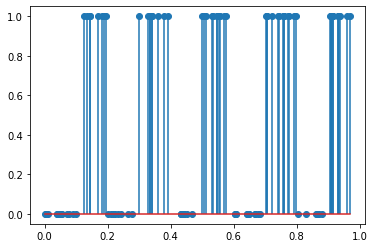

In [3]:
from functools import reduce
#data-set stuff
# m = 1000 #number of examples
# x_train = np.random.rand(m,N)
# y_train = (x_train>0.5).astype(np.int16)

m = 100

# pos_x = 0.25 + 0.5 * np.random.rand(m//2,1)
# neg_x1 = 0 + 0.25 * np.random.rand(m//4,1)
# neg_x2 = 0.75 + 0.25 * np.random.rand(m//4,1)
# neg_x = np.concatenate((neg_x1,neg_x2))

x_train = np.random.rand(m,1)



# x_train = np.concatenate((pos_x,neg_x))
y_train = reduce(np.logical_or,[np.logical_and(0.1<x_train,x_train<0.2),
                                np.logical_and(0.3<x_train,x_train<0.4),
                                np.logical_and(0.5<x_train,x_train<0.6),
                                np.logical_and(0.7<x_train,x_train<0.8),
                                np.logical_and(0.9<x_train,x_train<1)]).astype(np.int16)



# x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
# print(x_y)





fig,ax = plt.subplots(1)
ax.stem(x_train,y_train)


#define the node counts
N = 10 #number of input elements
H = 5 #number of hidden elements
M = 1 #number of output elements



#feature engineering
x_train_ = x_train
for i in range(2,N+1):
    x_train_ = np.hstack((x_train_,x_train**i))
x_train = x_train_

Calculated weights)
c: [-25.8174389]
V: [[ 18.06267089  25.77038325 -20.16539323  18.23259799   7.7013848 ]]
b: [-8.40349954 -6.70391702 -7.47353017 22.04985675 -2.11128021]
W: [[  1.79000927  -5.03316812  -2.66135248  -0.52654767   1.87834213
    3.67155819   5.703785     6.7550436    8.07324919   8.74641719]
 [  3.29373093   2.49986118   3.93187236   3.79538586   4.66645263
    4.22284539   4.0904403    4.26276702   3.18607432   3.49033492]
 [-11.38823873   1.22418401   3.37436364   5.5250594    7.61436371
    9.15988657   9.86622893  10.29287799   9.98955117  10.45787178]
 [ -7.68246637 -21.38604291 -21.53580009 -18.05637368 -14.3760711
  -10.46936209  -7.35107135  -4.16744103  -2.85403134  -1.69738366]
 [ 39.8933583    5.34366167   0.16471735  -0.51066344   0.06564605
    0.8068218    0.74673769   0.46358791   0.35336045   0.8522598 ]]
Final cost is: -0.0008639635913607929


C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_10504/388719269.py:81: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(cost_history))


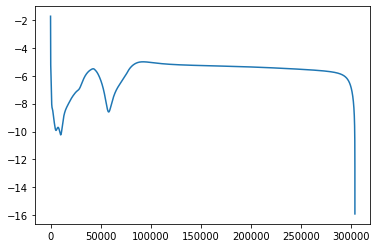

In [4]:





#our convension of x,y is different
x = x_train.T
y = y_train.T



#initialize the parameters as arrays with proper dimensions
W = np.random.rand(H,N)
b = np.random.rand(H)
V = np.random.rand(M,H)
c = np.random.rand(M)

cost_history = []

n_iters = 4_00_000
for _ in range(n_iters):
    
    #forward pass calculations
    h = sigmoid(W @ x + b.reshape(-1,1))
    y_hat = sigmoid(V @ (h) + c.reshape(-1,1))
    
    #y_hat_alpha - y_alpha
    diff = y_hat - y
    dSigmoidFactor_y_hat = y_hat * (1 - y_hat)
    
    intermediate_0 = diff * dSigmoidFactor_y_hat
    
    #fine tune c
    dE_dcALLAlpha = np.sum(intermediate_0, axis = 1)/m #dim = (M,)
    ##completely found :E_dcALLAlpha
    
    
    dE_dVALLAlphaALLBeta = np.zeros((M,H))
    for beta in range(H):
        dE_dVALLAlphaThisBeta = np.sum(intermediate_0 * h[beta,:], axis=1) /m
        dE_dVALLAlphaALLBeta[:,beta] = dE_dVALLAlphaThisBeta
    ##completely found :dE_dVALLAlphaALLBeta
    
    
    dE_dbALLAlpha = np.zeros(H)
    dE_dWALLAlpha_ALLBeta = np.zeros((H,N))
    
    for alpha in range(H):
        
        dSigmoidFactor_h_alpha = h[alpha,:] #temp
        dSigmoidFactor_h_alpha *= 1- dSigmoidFactor_h_alpha #done
        
        intermediate_1 = intermediate_0 * V[:,alpha].reshape(-1,1) * dSigmoidFactor_h_alpha
        dE_dbThisAlpha= np.sum(intermediate_1)/m
        dE_dbALLAlpha[alpha] = dE_dbThisAlpha
        
        for beta in range(N):
            dE_dWThisAlphaThisBeta= np.sum(intermediate_1 * x[beta,:])/m
            dE_dWALLAlpha_ALLBeta[alpha,beta] = dE_dWThisAlphaThisBeta
    ##completely found :dE_dbALLAlpha
    ##completely found :dE_dWALLAlpha_ALLBeta
    
    
    #All derivatives are now found
    
    #calc the cost now
    cost = np.sum(y_hat - y)/(2*m)
    cost_history.append(cost)
    
    ## Update parameters :: Gradient decesnt
    lr = 1
    
    c -= lr * dE_dcALLAlpha
    V -= lr * dE_dVALLAlphaALLBeta
    b -= lr * dE_dbALLAlpha
    W -= lr * dE_dWALLAlpha_ALLBeta

        

        
print("Calculated weights)")
print("c:",c)
print("V:",V)
print("b:",b)
print("W:",W)
plt.plot(np.log(cost_history))
print("Final cost is:",cost_history[-1])


In [5]:
def predict(x_test):
    x = x_test.T
    h = sigmoid(W @ x + b.reshape(-1,1))
    y_hat = sigmoid(V @ (h) + c.reshape(-1,1))
    y_predicted = y_hat.T>0.5
    return y_predicted,x,h,y_hat


In [6]:
#calc accuracy
y_pred = predict(x_train)[0]
accuracy = np.sum(y_pred == y_train)/np.prod(y_pred.shape)
print("Accuracy:", accuracy)

Accuracy: 0.81


In [7]:
xx = np.array([i/1000 for i in range(0,1000,3)]).reshape(-1,1)
#feature engineering
xx_ = xx
for i in range(2,N+1):
    xx_ = np.hstack((xx_,xx**i))
xx = xx_

yy = predict(xx)


print(yy)

(array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       

In [8]:
yy[1].T

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e-03, 9.00000000e-06, 2.70000000e-08, ...,
        6.56100000e-21, 1.96830000e-23, 5.90490000e-26],
       [6.00000000e-03, 3.60000000e-05, 2.16000000e-07, ...,
        1.67961600e-18, 1.00776960e-20, 6.04661760e-23],
       ...,
       [9.93000000e-01, 9.86049000e-01, 9.79146657e-01, ...,
        9.45352959e-01, 9.38735488e-01, 9.32164340e-01],
       [9.96000000e-01, 9.92016000e-01, 9.88047936e-01, ...,
        9.68444434e-01, 9.64570656e-01, 9.60712374e-01],
       [9.99000000e-01, 9.98001000e-01, 9.97002999e-01, ...,
        9.92027944e-01, 9.91035916e-01, 9.90044880e-01]])

In [9]:
yy[0]


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [10]:
yy[2].T

array([[2.24031567e-04, 1.22459834e-03, 5.67597551e-04, 1.00000000e+00,
        1.08005269e-01],
       [2.25227370e-04, 1.23677170e-03, 5.48549807e-04, 1.00000000e+00,
        1.20092761e-01],
       [2.26408949e-04, 1.24912285e-03, 5.30152907e-04, 1.00000000e+00,
        1.33341945e-01],
       ...,
       [9.99999987e-01, 1.00000000e+00, 1.00000000e+00, 2.15911573e-37,
        1.00000000e+00],
       [9.99999994e-01, 1.00000000e+00, 1.00000000e+00, 5.78214084e-38,
        1.00000000e+00],
       [9.99999997e-01, 1.00000000e+00, 1.00000000e+00, 1.52278948e-38,
        1.00000000e+00]])